In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the paths to your directories
train_dir = r"C:\Users\admin\Documents\mini_proj_bird\masked_images\train\train" # Update with the actual path
valid_dir = r"C:\Users\admin\Documents\mini_proj_bird\masked_images\valid\valid"  # Update with the actual path
test_dir = r"C:\Users\admin\Documents\mini_proj_bird\masked_images\test\test"    # Update with the actual path

# Image size and batch size
img_size = (224, 224)
batch_size = 32

# Define ImageDataGenerators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test sets, only rescaling is needed
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Or 'binary' depending on your task
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Or 'binary'
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Or 'binary'
    shuffle=False
)


Found 7045 images belonging to 200 classes.
Found 2369 images belonging to 200 classes.
Found 2374 images belonging to 200 classes.


In [13]:
import os

In [14]:
os.listdir(train_dir)

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

In [15]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [16]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


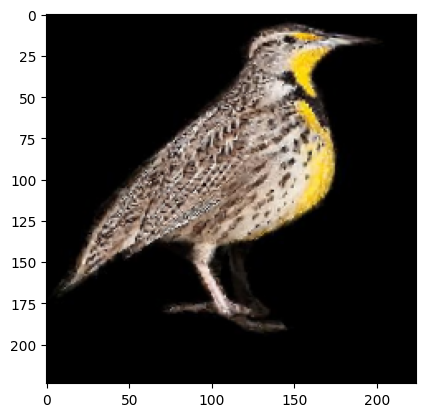

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

# Test ImageDataGenerator with a sample image
img, label = next(train_generator)
plt.imshow(img[0])  # Display the first image
plt.show()


In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras import layers

# Load VGG16 pretrained model
vgg16_model = VGG16(input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet')
vgg16_model.trainable = False  # Freeze the base model

# Build Sequential model
model_vgg16 = keras.Sequential([
    vgg16_model,
    layers.Flatten(),
    layers.Dense(units=1950, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=200, activation='softmax')
])

In [19]:
model_vgg16.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1950)              48923550  
                                                                 
 batch_normalization_1 (Bat  (None, 1950)              7800      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 200)               390200    
                                                                 
Total params: 64036238 (244.28 MB)
Trainable params: 49317650 (188.13 MB)
Non-trainable params: 14718588 (56.15 MB)
____

In [21]:
model_vgg16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [23]:
history = model_vgg16.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/20
221/221 [==============================] - 356s 2s/step - loss: 4.7940 - accuracy: 0.0962 - val_loss: 5.3248 - val_accuracy: 0.1313
Epoch 2/20
221/221 [==============================] - 371s 2s/step - loss: 3.1325 - accuracy: 0.2863 - val_loss: 3.5224 - val_accuracy: 0.2634
Epoch 3/20
221/221 [==============================] - 354s 2s/step - loss: 2.4987 - accuracy: 0.3940 - val_loss: 5.1273 - val_accuracy: 0.1824
Epoch 4/20
221/221 [==============================] - 357s 2s/step - loss: 2.1109 - accuracy: 0.4724 - val_loss: 3.0575 - val_accuracy: 0.3360
Epoch 5/20
221/221 [==============================] - 357s 2s/step - loss: 1.8742 - accuracy: 0.5178 - val_loss: 2.9502 - val_accuracy: 0.3335
Epoch 6/20
221/221 [==============================] - 355s 2s/step - loss: 1.6793 - accuracy: 0.5664 - val_loss: 3.0488 - val_accuracy: 0.3554
Epoch 7/20
221/221 [==============================] - 355s 2s/step - loss: 1.4762 - accuracy: 0.6072 - val_loss: 2.9823 - val_accuracy: 0.3626

In [24]:
model_vgg16.evaluate(test_generator)

75/75 [==============================] - 75s 997ms/step - loss: 3.0470 - accuracy: 0.3454


[3.046950578689575, 0.3454085886478424]

In [25]:
early_stop.best_epoch

4

In [26]:
early_stop.stopped_epoch

14

In [27]:
model_vgg16.evaluate(train_generator)

221/221 [==============================] - 237s 1s/step - loss: 1.6208 - accuracy: 0.5760


[1.6208431720733643, 0.5760113596916199]

In [38]:
print(f"Train accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Test accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Train loss: {history.history['loss'][-1]:.4f}")
print(f"Test loss: {history.history['val_loss'][-1]:.4f}")

Train accuracy: 0.7411
Test accuracy: 0.3976
Train loss: 0.9188
Test loss: 3.1804


In [35]:
history.history['accuracy']

[0.09623846411705017,
 0.2863023281097412,
 0.3940383195877075,
 0.4723917543888092,
 0.517814040184021,
 0.5663591027259827,
 0.6072391867637634,
 0.6295244693756104,
 0.6547906398773193,
 0.6559261679649353,
 0.6753726005554199,
 0.7030518054962158,
 0.7141234874725342,
 0.7217885255813599,
 0.7410929799079895]

In [29]:
model_vgg16.save("model_vgg16")  


INFO:tensorflow:Assets written to: model_vgg16\assets


INFO:tensorflow:Assets written to: model_vgg16\assets


In [30]:
#EfficientNet
from tensorflow.keras.applications import EfficientNetB0

# Load the EfficientNetB0 model
efficientnet_model = EfficientNetB0(input_shape=(224, 224, 3),
                                    include_top=False,
                                    weights='imagenet')

# Freeze the pre-trained model
efficientnet_model.trainable = False



16705208/16705208 [==============================] - 3s 0us/step


In [39]:
# Create a Sequential model and add layers
'''model_efficientnet = keras.Sequential([
    efficientnet_model,
    layers.Flatten(),
    layers.Dense(units=1950, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(units=200, activation='softmax'),
])

model_efficientnet.summary()'''



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 1950)              122305950 
                                                                 
 dropout (Dropout)           (None, 1950)              0         
                                                                 
 batch_normalization_3 (Bat  (None, 1950)              7800      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 200)              

In [40]:
# Compile the model
'''model_efficientnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)'''



In [42]:
'''from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
# Fit the model
history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50,
    verbose=1,
    callbacks=[early_stop]
)'''



Epoch 1/50
221/221 [==============================] - 370s 2s/step - loss: 5.5870 - accuracy: 0.0054 - val_loss: 5.3946 - val_accuracy: 0.0051
Epoch 2/50
221/221 [==============================] - 369s 2s/step - loss: 5.5984 - accuracy: 0.0044 - val_loss: 5.3147 - val_accuracy: 0.0051
Epoch 3/50
221/221 [==============================] - 368s 2s/step - loss: 5.5809 - accuracy: 0.0057 - val_loss: 5.3096 - val_accuracy: 0.0051
Epoch 4/50
221/221 [==============================] - 368s 2s/step - loss: 5.5809 - accuracy: 0.0050 - val_loss: 5.3059 - val_accuracy: 0.0042
Epoch 5/50
221/221 [==============================] - 367s 2s/step - loss: 5.5432 - accuracy: 0.0051 - val_loss: 5.3137 - val_accuracy: 0.0051
Epoch 6/50
221/221 [==============================] - 367s 2s/step - loss: 5.5537 - accuracy: 0.0051 - val_loss: 5.3061 - val_accuracy: 0.0051
Epoch 7/50
221/221 [==============================] - 373s 2s/step - loss: 5.5361 - accuracy: 0.0060 - val_loss: 5.3062 - val_accuracy: 0.0051

KeyboardInterrupt: 